In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as cp
import math
import datetime as dt
from matplotlib import rc
import matplotlib.gridspec as gridspec
from dateutil.relativedelta import relativedelta
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_length = 365*3 #(3 years worth of data)
kgs_in_quintal = 100

In [ ]:
#dates  = [dt.datetime.strptime(k[0], '%Y-%m-%d').date().strftime('%d-%b-%Y') for k in on]
#xtickdates = []
#for i,dat in enumerate(dates):
#    if i%3==0:
#        xtickdates.append(dat[3:].replace('-20','-'))
#    else:
#        xtickdates.append(' ')

start = dt.datetime(2013,1,1)
xdates = [str(start.date())]
tmp = start.date()
num_years = 3
num_labels=num_years*12
for i in range(num_years*4):
    tmp += relativedelta(months=num_years)
    xdates.append( str(tmp))
event_xdates = [str(start.date())]
tmp = start.date()
dates = ['01/13']
for i in range(num_labels):
    tmp += relativedelta(months=1)
    event_xdates.append( str(tmp))
    if (i+1)%3==0:
      dates.append(tmp.strftime('%m/%y'))
    else:
      dates.append(' ')

#### Converting x-tick labels into yy-mmm format
#dates = [dt.datetime.strptime(k, '%Y-%m-%d').date().strftime('%d-%b-%y') for k in xdates]
#### Generating all dates
xxdates = []
for i in range(data_length):
    xxdates.append(str(start.date()+dt.timedelta(i)))

In [ ]:
xdates

['2012-12-31',
 '2013-03-31',
 '2013-06-30',
 '2013-09-30',
 '2013-12-30',
 '2014-03-30',
 '2014-06-30',
 '2014-09-30',
 '2014-12-30',
 '2015-03-30',
 '2015-06-30',
 '2015-09-30',
 '2015-12-30']

### Show importance of events as a heatmap



In [ ]:
cbar_fontsize=16
cbar_padding = 0.01

In [ ]:
def convert_to_binary(raw_vals, raw):
  score_matrix = np.array(raw_vals)
  if raw:
    return MinMaxScaler().fit_transform(score_matrix)
  top_event_ids = np.argmax(score_matrix, 0)
  binary_matrix = np.zeros_like(score_matrix)
  binary_matrix[top_event_ids, range(binary_matrix.shape[1])] = 1
  return binary_matrix

In [ ]:
# taken from maplotlib official docs
def heatmap(data, row_labels, col_labels, ax=None, set_xticks=True, raw=True,
            cbar_kw={'format': '%.1f'}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, aspect='auto', vmin=0, vmax=1, **kwargs)

    # Create colorbar
    if raw:
      cbar = ax.figure.colorbar(im, ax=ax, pad=cbar_padding, **cbar_kw)
      cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize=cbar_fontsize)
    else:
      cbar=None

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    if col_labels:
      ax.set_xticklabels(col_labels, fontsize=14)
      # Rotate the tick labels and set their alignment.
      plt.setp(ax.get_xticklabels(), rotation=0,rotation_mode="anchor")
    ax.set_yticklabels(row_labels, fontsize=12)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Turn spines off and create white grid.
    if raw:
      [s.set_visible(False) for s in ax.spines.values()]

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    if raw:
      ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    else:
      ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.tick_params(axis='y', length=0)
    ax.tick_params(axis='x', length=0.5)
    if not set_xticks:
          ax.tick_params(axis='x', length=0)
          ax.set_xticklabels([])

    return im, cbar

In [ ]:
event_scores_path = '/content/drive/MyDrive/news-based-forecasting/'
# crop_importance_vals = cp.load(open(event_path+'crop_event.dict', 'rb'))
crop_importance_vals = cp.load(open(event_scores_path+'event_importance_scores_shap.dict', 'rb'))
on_importance = crop_importance_vals['Onion']
pot_importance = crop_importance_vals['Potato']
wh_importance = crop_importance_vals['Wheat']
rice_importance = crop_importance_vals['Rice']
#np.setdiff1d(pot_events, np.array(pot_importance.keys()))
#np.unique(pot_events), pot_importance.keys()

In [ ]:
importance = rice_importance
[len(importance[event]) for event in importance]

[36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]

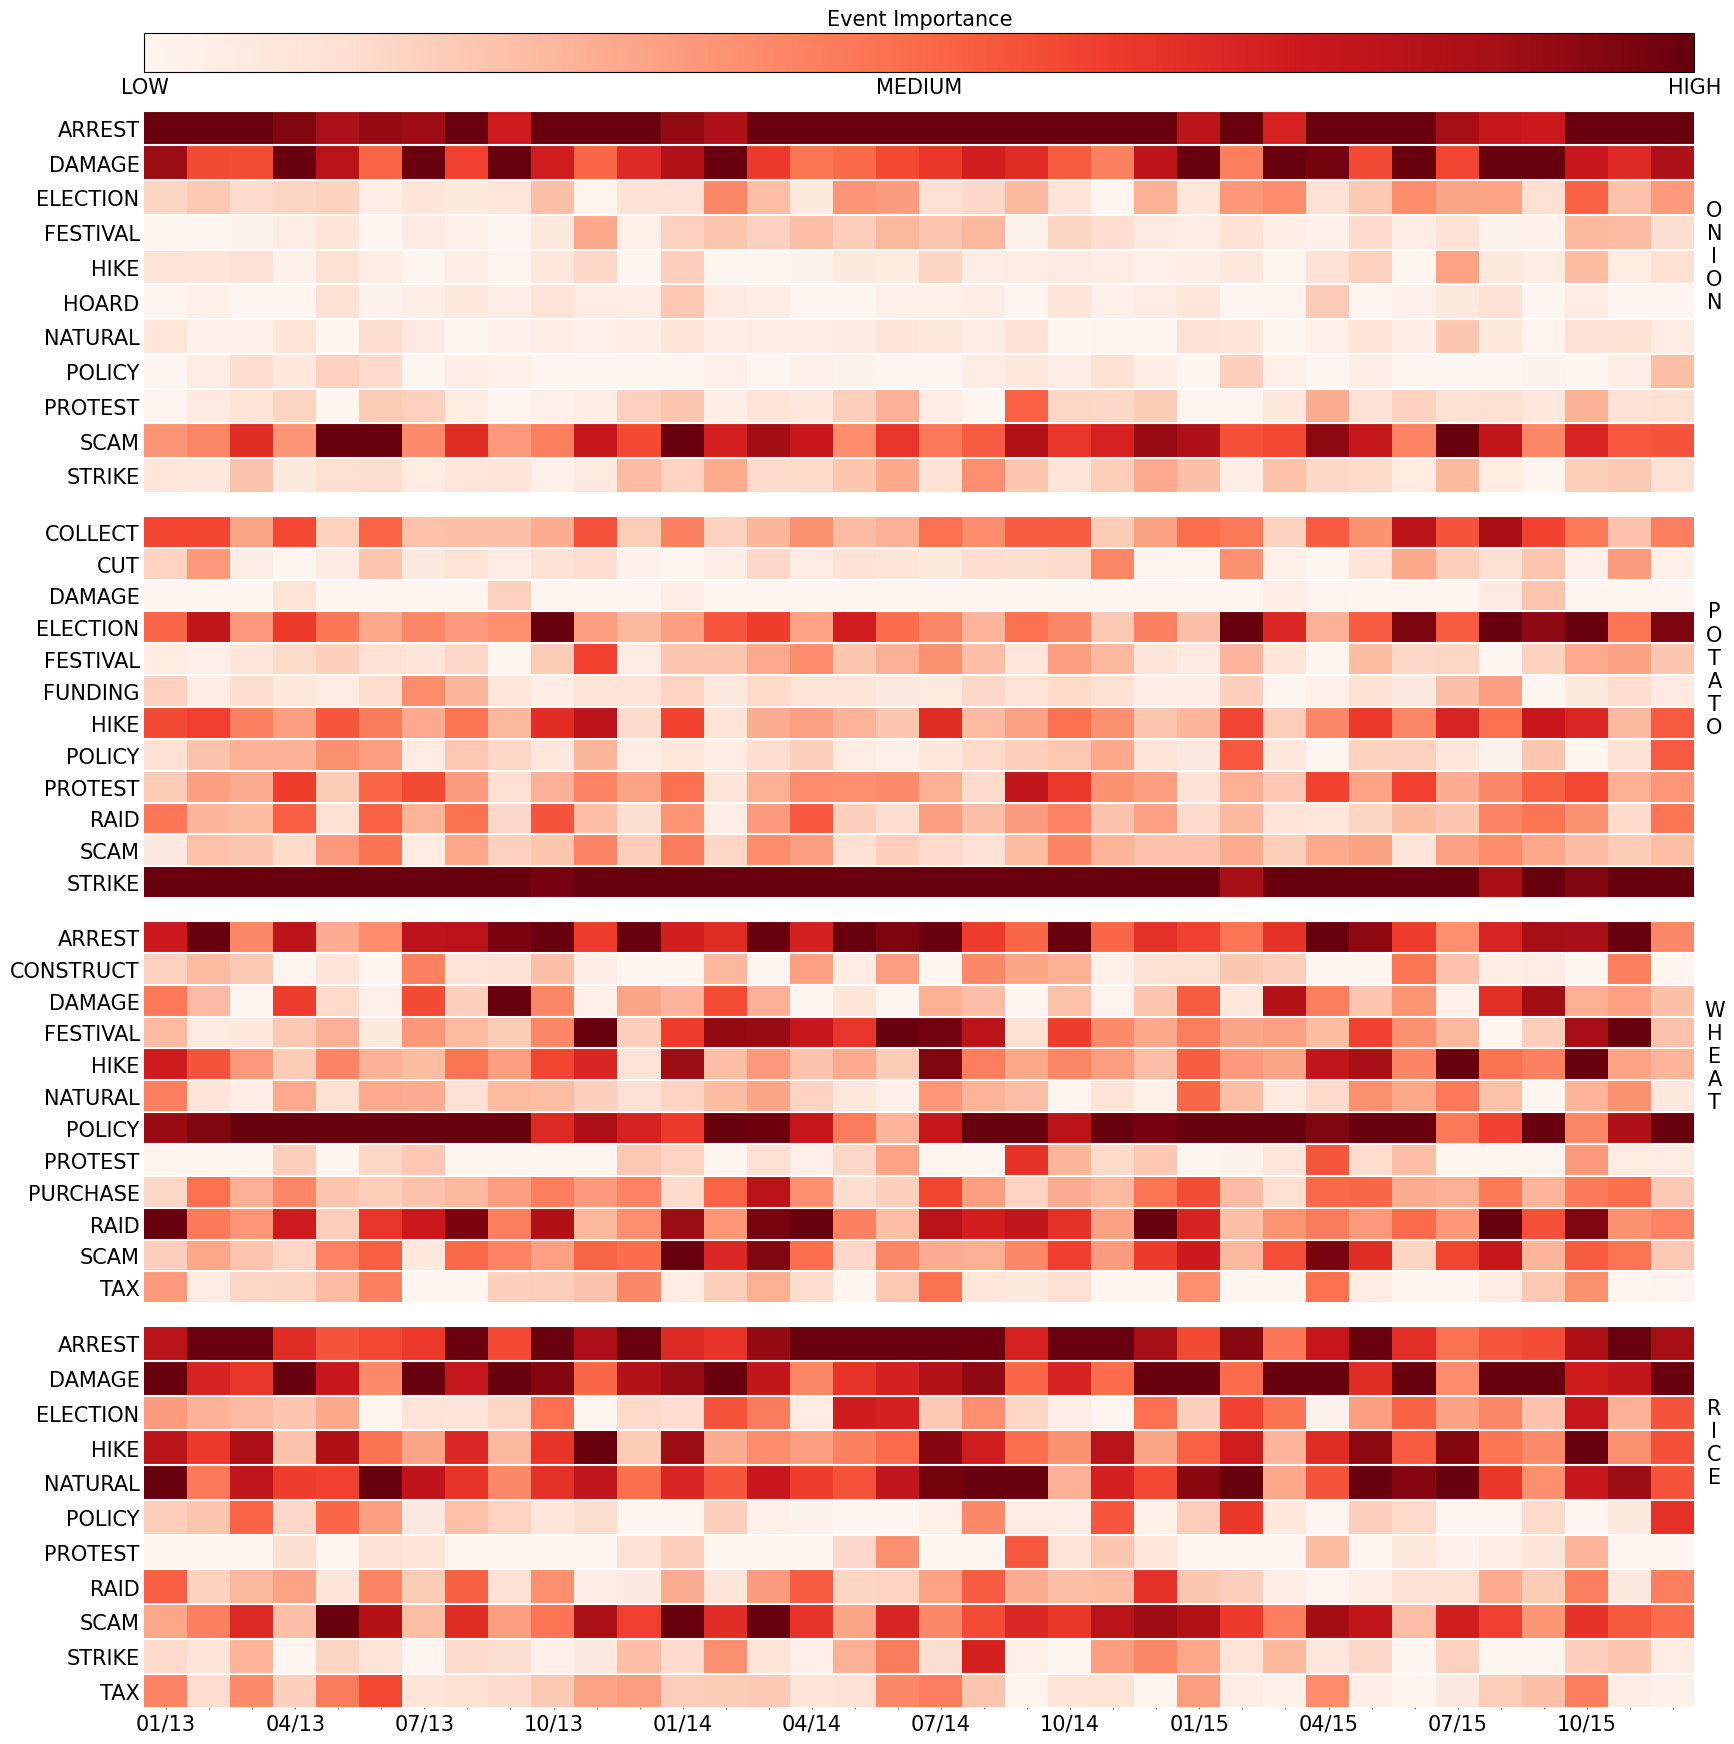

In [ ]:
def newline_join(input_str):
  return '\n'.join(input_str)
## plot heatmaps
# read in the importance values
raw = True
ytick_fontsize = 15
title_fontsize=15
clabel_fontsize=25
event_linewidth=1.5
cmap_color='binary' if not raw else 'Reds'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 25))
fig.subplots_adjust(hspace=0.06)
#gs1.update(wspace=0.04, hspace=0.25)
# set the spacing between axes.

# prepare the importance data as a 2D array
# onion
row_labels = []
vals_to_plot = []
importance_vals = on_importance
event_list = sorted(importance_vals.keys())
ax=ax1
for event in event_list:
  if event not in row_labels:
    row_labels.append(event.strip())
    vals_to_plot.append(importance_vals[event])
data = convert_to_binary(vals_to_plot, raw)
ax.imshow(data, vmin=0, vmax=1, cmap=cmap_color, aspect='auto')
[s.set_visible(False) for s in ax.spines.values()]
ax.grid(which="minor", color="w", linestyle='-', linewidth=event_linewidth)
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.set_yticklabels(row_labels, fontsize=ytick_fontsize)
ax.tick_params(which="minor", bottom=False, left=False)
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0)
ax.set_xticklabels([])
ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

# potato
row_labels = []
vals_to_plot = []
importance_vals = pot_importance
event_list = sorted(importance_vals.keys())
#event_list = sorted(pot_events)
ax=ax2
for event in event_list:
  if event not in row_labels:
    row_labels.append(event)
    vals_to_plot.append(importance_vals[event])
data = convert_to_binary(vals_to_plot, raw)
ax.imshow(data, vmin=0, vmax=1, cmap=cmap_color, aspect='auto')
[s.set_visible(False) for s in ax.spines.values()]
ax.grid(which="minor", color="w", linestyle='-', linewidth=event_linewidth)
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.set_yticklabels(row_labels, fontsize=ytick_fontsize)
ax.tick_params(which="minor", bottom=False, left=False)
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0)
ax.set_xticklabels([])
ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)
# wheat
row_labels = []
vals_to_plot = []
importance_vals = wh_importance
ax=ax3
event_list = sorted(importance_vals.keys())
#event_list = sorted(wheat_events)
for event in event_list:
  if event not in row_labels:
    row_labels.append(event)
    vals_to_plot.append(importance_vals[event])

data = convert_to_binary(vals_to_plot, raw)
ax.imshow(data, vmin=0, vmax=1, cmap=cmap_color, aspect='auto')
[s.set_visible(False) for s in ax3.spines.values()]
ax.grid(which="minor", color="w", linestyle='-', linewidth=event_linewidth)
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.set_yticklabels(row_labels, fontsize=ytick_fontsize)
ax.tick_params(which="minor", bottom=False, left=False)
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0)
ax.set_xticklabels([])
ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)


# rice
row_labels = []
vals_to_plot = []
importance_vals = rice_importance
event_list = sorted(importance_vals.keys())
#event_list = sorted(rice_events)
ax=ax4
for event in event_list:
  if event not in row_labels:
    row_labels.append(event)
    vals_to_plot.append(importance_vals[event])

data = convert_to_binary(vals_to_plot, raw)
im = ax.imshow(data, vmin=0, vmax=1, cmap=cmap_color, aspect='auto')
ax.yaxis.set_label_position('right')
[s.set_visible(False) for s in ax.spines.values()]
ax.grid(which="minor", color="w", linestyle='-', linewidth=event_linewidth)
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
ax.set_yticklabels(row_labels, fontsize=ytick_fontsize)
ax.tick_params(which="minor", bottom=False, left=False)
ax.tick_params(axis='y', length=0)
ax.tick_params(axis='x', length=0.5)
ax.set_xticklabels(dates[:-1], fontsize=ytick_fontsize)
ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

cbar = fig.colorbar(im, ax=[ax1, ax2, ax3, ax4], aspect=40, pad=0.02, location='top')
cbar.ax.set_xlabel('Event Importance', fontsize=title_fontsize, labelpad=6.0)
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.set_ticks(np.arange(0, 1.1, 0.5))
cbar.set_ticklabels(['LOW', 'MEDIUM', 'HIGH'])
cbar.ax.tick_params(labelsize=ytick_fontsize, length=0)
fig.text(0.91, 0.67, newline_join('ONION'), fontsize=title_fontsize, rotation=0, ha='center')
fig.text(0.91, 0.50, newline_join('POTATO'), fontsize=title_fontsize, rotation=0, ha='center')
fig.text(0.91, 0.35, newline_join('WHEAT'), fontsize=title_fontsize, rotation=0, ha='center')
fig.text(0.91, 0.20, newline_join('RICE'), fontsize=title_fontsize, rotation=0, ha='center')
#fig.text(0.83, 0.57, 'Event importance', fontsize=clabel_fontsize, rotation=90)
plt.savefig('fig4.pdf')